# Kelompok 01 : Jumlah DTKS Berdasarkan Kelurahan di Jawa Barat
Kami dari kelompok 01 yang beranggotakan:

~ Fathan Shofwan Apip

~ Muhamad Fikri Nur Bakhtiar

~ Muhammad Satria Ramadhani

~ Wildan Septi Ramadhan

Mengerjakan tugas Data Mining dan Warehouse dengan menggunakan dataset "Jumlah DTKS Berdasarkan Kelurahan di Jawa Barat pada tahun 2019-2020". Adapun sumber dataset dapat diakses melalui:
https://opendata.jabarprov.go.id/id/dataset/jumlah-dtks-berdasarkan-kelurahan-di-jawa-barat

#### #1: Inisialisasi library dan dataset ke Jupyter Notebook.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Direktori file menyesuaikan.
df = pd.read_csv("D:\\data.jabarprov.go.id\\jumlah_dtks_berdasarkan_kelurahan_data.csv")
df.head(10)

,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,jumlah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010001,MALASARI,1/21/32,NANGGUNG,32.01.21.2001,MALASARI,1075,KRTS,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010002,BANTAR KARET,1/21/32,NANGGUNG,32.01.21.2004,BANTARKARET,1277,KRTS,2019
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010003,CISARUA,1/21/32,NANGGUNG,32.01.21.2003,CISARUA,1089,KRTS,2019
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010004,CURUG BITUNG,1/21/32,NANGGUNG,32.01.21.2002,CURUGBITUNG,1092,KRTS,2019
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010005,NANGGUNG,1/21/32,NANGGUNG,32.01.21.2007,NANGGUNG,851,KRTS,2019
5,6,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010006,PANGKAL JAYA,1/21/32,NANGGUNG,32.01.21.2009,PANGKALJAYA,1070,KRTS,2019
6,7,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010007,SUKALUYU,1/21/32,NANGGUNG,32.01.21.2010,SUKALUYU,919,KRTS,2019
7,8,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010008,HAMBARO,1/21/32,NANGGUNG,32.01.21.2005,HAMBARO,856,KRTS,2019
8,9,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010009,KALONG LIUD,1/21/32,NANGGUNG,32.01.21.2006,KALONGLIUD,758,KRTS,2019
9,10,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201010,NANGGUNG,3201010010,PARAKAN MUNCANG,1/21/32,NANGGUNG,32.01.21.2008,PARAKANMUNCANG,816,KRTS,2019


#### #2: Baca daftar kolom yang ada pada data.

In [3]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11956 entries, 0 to 11955
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              11956 non-null  int64 
 1   kode_provinsi                   11956 non-null  int64 
 2   nama_provinsi                   11956 non-null  object
 3   bps_kode_kabupaten_kota         11956 non-null  int64 
 4   bps_nama_kabupaten_kota         11956 non-null  object
 5   bps_kode_kecamatan              11956 non-null  object
 6   bps_nama_kecamatan              11956 non-null  object
 7   bps_kode_desa_kelurahan         11956 non-null  object
 8   bps_desa_kelurahan              11956 non-null  object
 9   kemendagri_kode_kecamatan       11956 non-null  object
 10  kemendagri_nama_kecamatan       11956 non-null  object
 11  kemendagri_kode_desa_kelurahan  11956 non-null  object
 12  kemendagri_nama_desa_kelurahan  11956 non-null

11956

#### #3: Eksplorasi jumlah data.
Setelah diperhatikan, data "kode_provinsi", "nama_provinsi", dan "satuan" hanya memiliki 1 _value_, sehingga kolom bisa dihilangkan.

Selain itu, ada ketidaksinkronan data antara BPS dengan Kemendagri. Untuk memudahkan praproses, maka data yang digunakan akan dari BPS terlebih dahulu. Data Kemendagri disimpan di dataset back-up.

In [4]:
df = df.drop(df.columns[df.nunique()==1],axis=1)

In [5]:
df_backup = df.copy()
df = df.drop(['kemendagri_kode_kecamatan','kemendagri_nama_kecamatan','kemendagri_kode_desa_kelurahan','kemendagri_nama_desa_kelurahan'],axis=1)

Data setelah beberapa atribut dihapus.

In [6]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11956 entries, 0 to 11955
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       11956 non-null  int64 
 1   bps_kode_kabupaten_kota  11956 non-null  int64 
 2   bps_nama_kabupaten_kota  11956 non-null  object
 3   bps_kode_kecamatan       11956 non-null  object
 4   bps_nama_kecamatan       11956 non-null  object
 5   bps_kode_desa_kelurahan  11956 non-null  object
 6   bps_desa_kelurahan       11956 non-null  object
 7   jumlah                   11956 non-null  int64 
 8   tahun                    11956 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 840.8+ KB


11956

#### #4: Plot grafik "bps_nama_kabupaten_kota" dengan perbandingan "tahun" menggunakan countplot.

<AxesSubplot:xlabel='tahun', ylabel='count'>

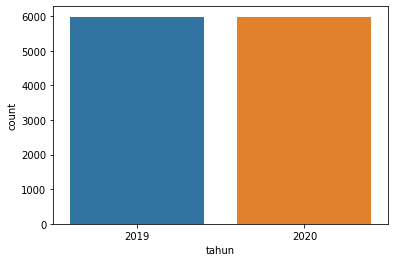

In [7]:
sns.countplot(x="tahun", data=df)

Data yang menarik di sini adalah, tahun 2019 dan 2020 hampir sama. Sulit untuk dibedakan secara grafik, sehingga memerlukan data angka lebih lanjut.

In [8]:
df.tahun.value_counts()

2019    5983
2020    5973
Name: tahun, dtype: int64

Dapat dilihat, hal yang menarik adalah perbedaan jumlah DTKS pada tahun 2019 dengan 2020 hanya ada sepuluh. Untuk lebih detailnya, kita lihat sesuai kabupaten/kota.

<AxesSubplot:xlabel='bps_nama_kabupaten_kota', ylabel='count'>

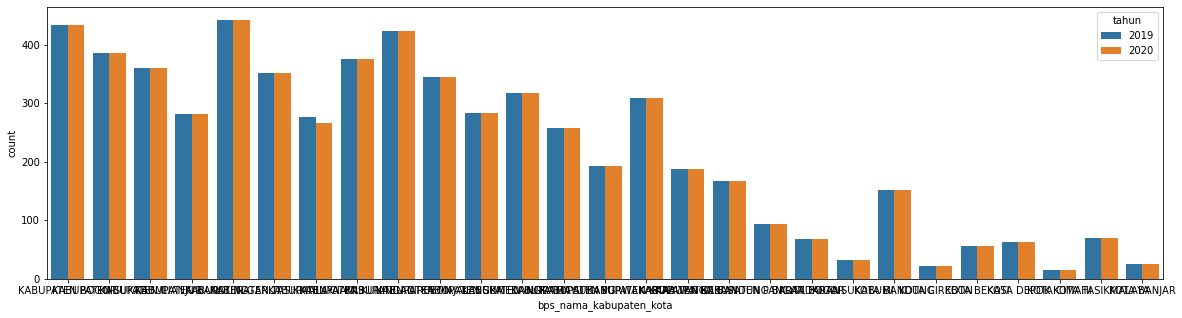

In [9]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(ax=ax, x="bps_nama_kabupaten_kota", hue="tahun", data=df)

Karena nama data sulit dibaca, gunakan "bps_kode_kabupaten_kota" saja.

Meski begitu, pembacaan grafik akan sulit karena kita hanya melihat kodenya saja. Oleh karena itu, tambahkan keterangan tambahan dengan menggunakan fungsi agregasi. Tampilkan data secara maksimal.

In [10]:
agg_codename=df.groupby(["bps_kode_kabupaten_kota","bps_nama_kabupaten_kota"])["bps_nama_kabupaten_kota"].count().rename("Total").reset_index()
agg_codename.head(30)

,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,Total
0,3201,KABUPATEN BOGOR,868
1,3202,KABUPATEN SUKABUMI,772
2,3203,KABUPATEN CIANJUR,720
3,3204,KABUPATEN BANDUNG,562
4,3205,KABUPATEN GARUT,884
5,3206,KABUPATEN TASIKMALAYA,702
6,3207,KABUPATEN CIAMIS,542
7,3208,KABUPATEN KUNINGAN,752
8,3209,KABUPATEN CIREBON,848
9,3210,KABUPATEN MAJALENGKA,690


<AxesSubplot:xlabel='bps_kode_kabupaten_kota', ylabel='count'>

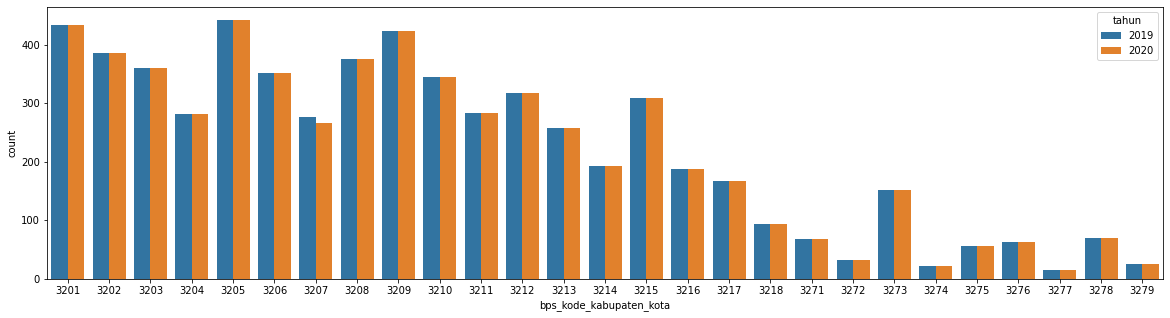

In [11]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(ax=ax, x="bps_kode_kabupaten_kota", hue="tahun", data=df)

Perbedaan yang menarik di sini hanya berada di Kabupaten/Kota dengan kode 3207 (Kab. Ciamis), maka penelurusan lebih lanjut akan dilakukan di sana terlebih dahulu.